# Dropout Regularization In Deep Neural Network

Dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. A binary classification problem that requires a model to differentiate rocks from metal cylinders.

Dataset information: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) Download Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('sonar_dataset.csv',header = None)
df[:10]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [11]:
df.shape

(208, 61)

In [17]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [18]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [20]:
df[60] # the output columns that has to be split form this df

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [22]:
df[60].value_counts() # analysing the column and finding how many 'M' and 'R'

60
M    111
R     97
Name: count, dtype: int64

In [24]:
X = df.drop(60, axis=1) # dropping col 60 and splitting to two data sets X and y
y = df[60]

In [45]:
# 'ONE HOT ENCODING' changing all 'M' and 'R' values to 1 and 0 using one hot encoding
y = pd.get_dummies(y, drop_first=True)
y = y.astype(int)
y.value_counts() ,y

(R
 0    111
 1     97
 Name: count, dtype: int64,
      R
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 203  0
 204  0
 205  0
 206  0
 207  0
 
 [208 rows x 1 columns])

In [145]:
# Creating Training and testing set from df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [146]:
X_train.shape

(135, 60)

## Applying Deep leanring Model 
### Without Droupout

In [49]:
import tensorflow as tf
from tensorflow import keras

In [147]:
#Modelling Layers, compilation and model fitting
model_1 = keras.Sequential([
    keras.layers.Dense(60, input_shape = (60,), activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

model_1.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
17/17 [==============================] - 0s 522us/step - loss: 0.6861 - accuracy: 0.5556
Epoch 2/100
17/17 [==============================] - 0s 462us/step - loss: 0.6708 - accuracy: 0.6148
Epoch 3/100
17/17 [==============================] - 0s 484us/step - loss: 0.6522 - accuracy: 0.6519
Epoch 4/100
17/17 [==============================] - 0s 427us/step - loss: 0.6402 - accuracy: 0.6741
Epoch 5/100
17/17 [==============================] - 0s 461us/step - loss: 0.6079 - accuracy: 0.6889
Epoch 6/100
17/17 [==============================] - 0s 447us/step - loss: 0.5757 - accuracy: 0.7407
Epoch 7/100
17/17 [==============================] - 0s 442us/step - loss: 0.5427 - accuracy: 0.7630
Epoch 8/100
17/17 [==============================] - 0s 428us/step - loss: 0.5295 - accuracy: 0.7630
Epoch 9/100
17/17 [==============================] - 0s 457us/step - loss: 0.4777 - accuracy: 0.7778
Epoch 10/100
17/17 [==============================] - 0s 445us/step - loss: 0.4626 - accura

17/17 [==============================] - 0s 437us/step - loss: 0.0137 - accuracy: 1.0000
Epoch 82/100
17/17 [==============================] - 0s 411us/step - loss: 0.0121 - accuracy: 1.0000
Epoch 83/100
17/17 [==============================] - 0s 412us/step - loss: 0.0116 - accuracy: 1.0000
Epoch 84/100
17/17 [==============================] - 0s 430us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 85/100
17/17 [==============================] - 0s 445us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 86/100
17/17 [==============================] - 0s 429us/step - loss: 0.0121 - accuracy: 1.0000
Epoch 87/100
17/17 [==============================] - 0s 425us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 88/100
17/17 [==============================] - 0s 421us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 89/100
17/17 [==============================] - 0s 422us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 90/100
17/17 [==============================] - 0s 406us/step - loss: 0.0084 - accuracy: 

In [148]:
model_1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 914us/step - loss: 0.7522 - accuracy: 0.7534


[0.752241849899292, 0.7534246444702148]

In [149]:
y1_pred = model_1.predict(X_test)
#y1_pred[:5]
y1_pred = np.round(y1_pred)
y1_pred[:10].T

3/3 [==============================] - 0s 876us/step


array([[0., 1., 0., 0., 1., 1., 0., 1., 0., 1.]], dtype=float32)

In [150]:
#y_test[:10].T
y_test.shape,y1_pred.shape

((73, 1), (73, 1))

In [151]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        36
           1       0.81      0.68      0.74        37

    accuracy                           0.75        73
   macro avg       0.76      0.75      0.75        73
weighted avg       0.76      0.75      0.75        73



In [152]:
# Changing predition values to one dimentional to plot comfusion matrix
y_pred_new = []
for element in y1_pred:
    if element == 0:
        y_pred_new.append(0)
    else:
        y_pred_new.append(1)

Text(58.222222222222214, 0.5, 'Y_Truth')

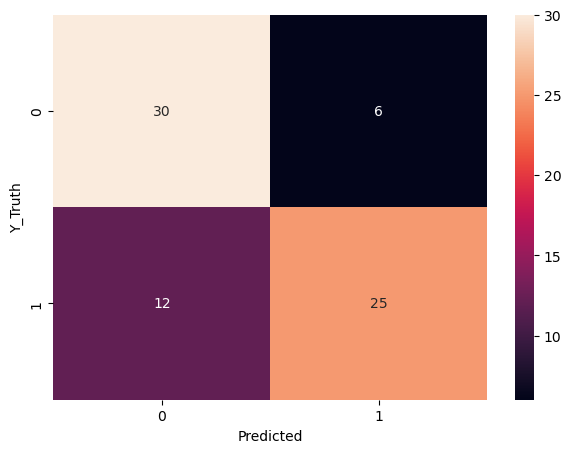

In [153]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_new)

plt.figure(figsize = (7,5))
sb.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Y_Truth')

## Model with Dropout layer

In [154]:
#Modelling Layers, compilation and model fitting
model_2 = keras.Sequential([
    keras.layers.Dense(60, input_shape = (60,), activation = 'relu'),
    keras.layers.Dropout(0.1),  # Droupout rate 50%
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

model_2.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
17/17 [==============================] - 0s 526us/step - loss: 0.7027 - accuracy: 0.4963
Epoch 2/100
17/17 [==============================] - 0s 485us/step - loss: 0.6923 - accuracy: 0.5185
Epoch 3/100
17/17 [==============================] - 0s 476us/step - loss: 0.6749 - accuracy: 0.5926
Epoch 4/100
17/17 [==============================] - 0s 409us/step - loss: 0.6605 - accuracy: 0.6370
Epoch 5/100
17/17 [==============================] - 0s 399us/step - loss: 0.6462 - accuracy: 0.6741
Epoch 6/100
17/17 [==============================] - 0s 426us/step - loss: 0.6137 - accuracy: 0.6593
Epoch 7/100
17/17 [==============================] - 0s 443us/step - loss: 0.6083 - accuracy: 0.7259
Epoch 8/100
17/17 [==============================] - 0s 434us/step - loss: 0.5616 - accuracy: 0.7111
Epoch 9/100
17/17 [==============================] - 0s 453us/step - loss: 0.5672 - accuracy: 0.7407
Epoch 10/100
17/17 [==============================] - 0s 456us/step - loss: 0.5060 - accura

17/17 [==============================] - 0s 434us/step - loss: 0.0566 - accuracy: 0.9778
Epoch 82/100
17/17 [==============================] - 0s 441us/step - loss: 0.0374 - accuracy: 0.9852
Epoch 83/100
17/17 [==============================] - 0s 426us/step - loss: 0.0220 - accuracy: 1.0000
Epoch 84/100
17/17 [==============================] - 0s 440us/step - loss: 0.0445 - accuracy: 0.9852
Epoch 85/100
17/17 [==============================] - 0s 434us/step - loss: 0.0273 - accuracy: 0.9926
Epoch 86/100
17/17 [==============================] - 0s 444us/step - loss: 0.0201 - accuracy: 1.0000
Epoch 87/100
17/17 [==============================] - 0s 431us/step - loss: 0.0247 - accuracy: 0.9926
Epoch 88/100
17/17 [==============================] - 0s 440us/step - loss: 0.0558 - accuracy: 0.9704
Epoch 89/100
17/17 [==============================] - 0s 432us/step - loss: 0.0500 - accuracy: 0.9704
Epoch 90/100
17/17 [==============================] - 0s 443us/step - loss: 0.0775 - accuracy: 

In [155]:
model_2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 916us/step - loss: 0.6640 - accuracy: 0.8219


[0.6639694571495056, 0.8219178318977356]

In [156]:
y2_pred = model_2.predict(X_test)
#y1_pred[:5]
y2_pred = np.round(y2_pred)
y2_pred[:10].T

3/3 [==============================] - 0s 809us/step


array([[0., 1., 1., 0., 1., 1., 0., 1., 0., 1.]], dtype=float32)

In [157]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        36
           1       0.85      0.78      0.82        37

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73



In [158]:
# Changing predition values to one dimentional to plot comfusion matrix
y_pred_new = []
for element in y2_pred:
    if element == 0:
        y_pred_new.append(0)
    else:
        y_pred_new.append(1)

Text(58.222222222222214, 0.5, 'Y_Truth')

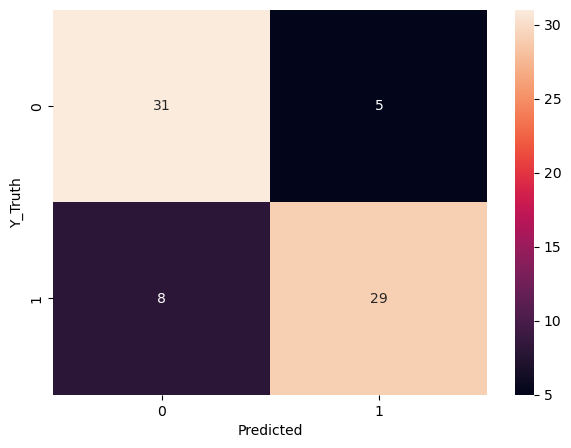

In [159]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_new)

plt.figure(figsize = (7,5))
sb.heatmap(cm2,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Y_Truth')